# <center>Bike Sharing Assignment</center>

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So company decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.Company decides to find the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Approach:
- Step 1: Reading and Understanding the Data
- Step 2: Visualising the Data
- Step 3: Data Preparation
- Step 4: Splitting the Data into Training and Testing Sets
- Step 5: Building a linear model
- Step 6: Checking VIF
- Step 7: Residual Analysis of the train data
- Step 8: Making Predictions Using the Final Model
- Step 9: Model Evaluation

### Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [3]:
pd.set_option('display.max_columns' , 100)

In [4]:
#Reading the data

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Inspect the various aspects of the housing dataframe

In [5]:
#Checking the shape
bike.shape

(730, 16)

In [6]:
#Checking null values and datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Inference:** None of the column have missing/null values

In [7]:
# Checking mathematiacal distribution of the variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# instant is an index column and hence not useful in predition of the target variable "cnt", so drop the instant column
bike.drop('instant',axis=1,inplace=True)

In [9]:
# As per Dataset characteristics, cnt coulmn is count of total rental bikes including both casual and registered 
# Drop Casual and Registrerd as they both contribute to our Target variable, "Cnt".
bike.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
#Dropping Date column as it is not required anymore. We have month and year column
bike.drop("dteday", axis=1 , inplace=True)

In [11]:
# Drop holiday column, because, 0 in working day already reflrepresents a holiday

bike.drop("holiday" , inplace=True , axis=1)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


From data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables

### Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

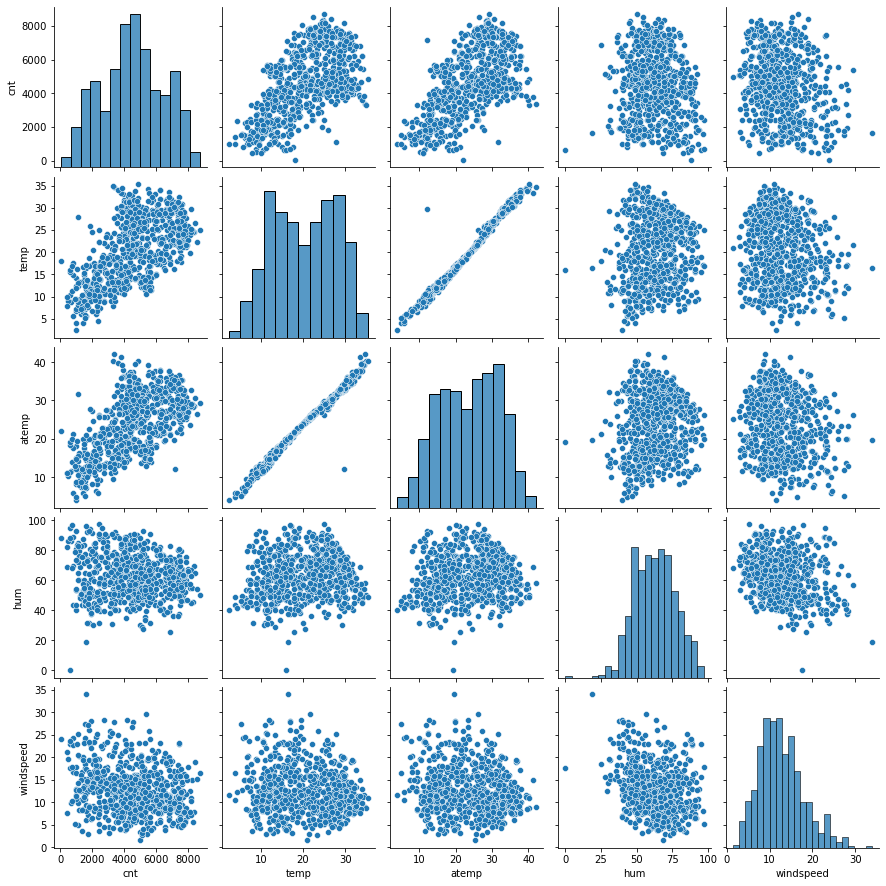

In [12]:
#Scatterplot to identify the relationship between Count and other continous variables

sns.pairplot(bike[["cnt" , "temp" , "atemp" , "hum", "windspeed"]])
plt.show()

**Inference:** Independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

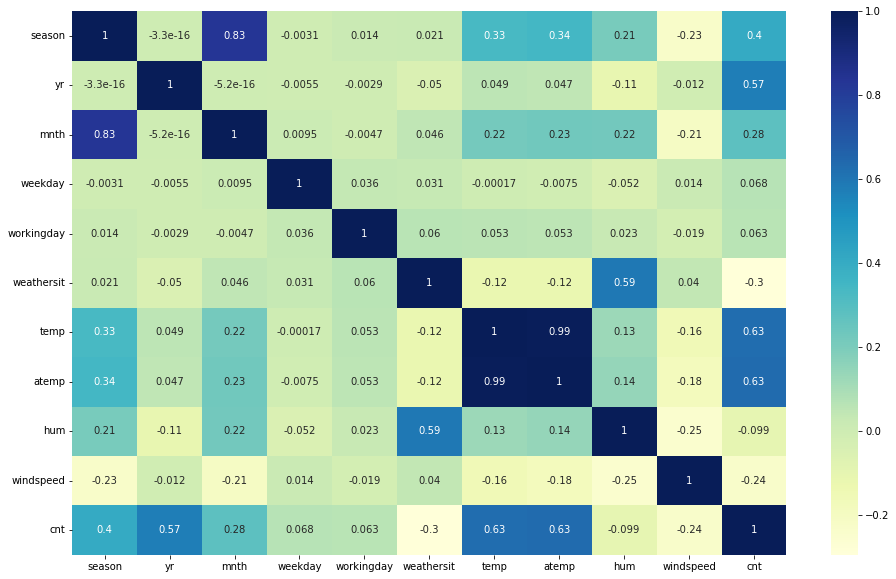

In [13]:
#Check the correlation between every variable

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
bike.corr().round(2)
plt.show()

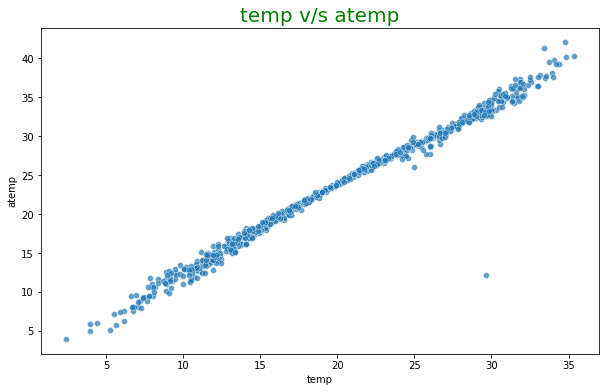

In [14]:
# Check the correlation between temp and atemp using scatter plot

plt.figure(figsize= [10,6])
sns.scatterplot(bike.temp , bike.atemp , alpha=0.7)
plt.title("temp v/s atemp" , fontdict={'fontsize' : 20 , 'color' : "Green" })
plt.show()

Correlation between temp and atemp is 0.99 which is almost 1

In [15]:
#Let us drop temp and consider atemp

bike.drop(['atemp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


In [16]:
# Rename the columns for better readibility 

bike.rename(columns={"yr" : "year", "mnth" : "month", "weekday" : "week_day" , "workingday" : "work_day",
                     "weathersit" : "weather_situation", "temp" : "temperature", "hum" : "humidity", "windspeed" : "wind_speed",
                     "cnt" :"count"} , inplace=True)
bike.head()

,season,year,month,week_day,work_day,weather_situation,temperature,humidity,wind_speed,count
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

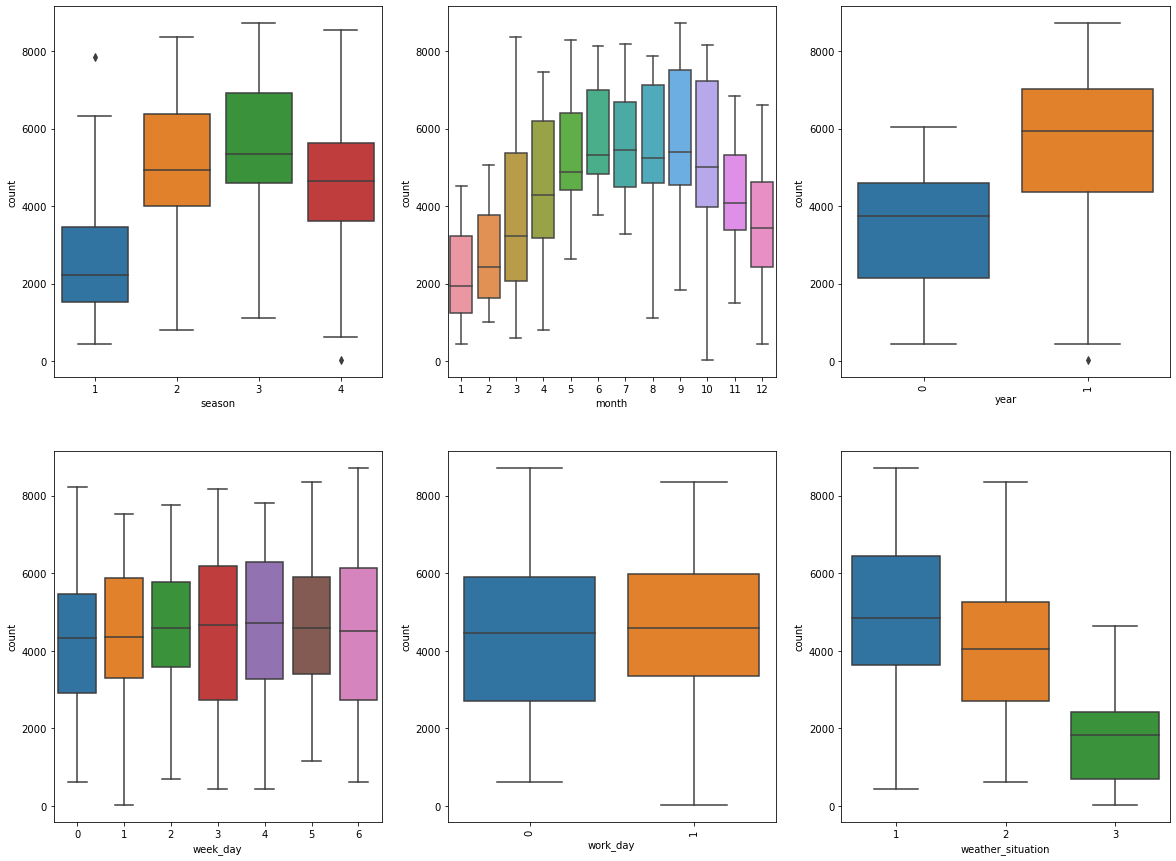

In [17]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.boxplot(x = 'week_day', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'work_day', y = 'count', data = bike)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.boxplot(x = 'weather_situation', y = 'count', data = bike)
plt.show()

**Inference:**
- For Season, Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.
- Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
- For year 2019, count of users is higher than year 2018.
- The bike demand is almost even throughout the week.
- The count of users is almost double for working than a non working day.
- Almost 67% of the bike booking were happening during clear weather with a median of close to 5000 booking (for the period of 2 years). This was followed by cloudy-misty day with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.


### Step 3: Data Preparation

In [18]:
bike.head()

,season,year,month,week_day,work_day,weather_situation,temperature,humidity,wind_speed,count
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


**Inference:** There are only two binary variables viz., "year" and "work_day". Both are already in binary format. Hence no binary conversion is required for given dataset

#### Mapping Categorical values with respective values

In [19]:
# Map "year" column
bike["year"] = np.where(bike["year"] == 0 , 2018 , 2019)

In [20]:
# Map Season Column
bike['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)

In [21]:
# Map Month column
bike['month'].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep",
                     10:"Oct",11:"Nov",12:"Dec"},inplace=True)

In [22]:
# Map weekday column
bike['week_day'].replace({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"},inplace=True)

In [23]:
# Map weathersit column
bike['weather_situation'].replace({1:'Clear', 2:'Mist', 3:'Light_Rain_Snow', 4:'Heavy_Rain_Snow'},inplace=True)

In [24]:
bike.head()

,season,year,month,week_day,work_day,weather_situation,temperature,humidity,wind_speed,count
0,spring,2018,Jan,Sunday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Monday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Thursday,1,Clear,9.305237,43.6957,12.522300,1600


#### Creating Dummy Variables

In [25]:
dummy_season = pd.get_dummies(bike['season'], drop_first = True)

dummy_month = pd.get_dummies(bike['month'], drop_first = True)

dummy_week = pd.get_dummies(bike['week_day'], drop_first = True)

dummy_weather = pd.get_dummies(bike['weather_situation'], drop_first = True)

In [26]:
# Concatenation Dummy variable dataframe to original dataframe
bike = pd.concat([bike , dummy_season] , axis=1)
bike = pd.concat([bike , dummy_month] , axis=1)
bike = pd.concat([bike , dummy_week] , axis=1)
bike = pd.concat([bike , dummy_weather] , axis=1)

bike.head()

,season,year,month,week_day,work_day,weather_situation,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
0,spring,2018,Jan,Sunday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,spring,2018,Jan,Monday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
# Dropping original columns after dummy creation

bike.drop(["season" , "month" , "week_day" , "weather_situation"] , inplace=True , axis=1)

bike.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
0,2018,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2018,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2018,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2018,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2018,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
# Check shape of dataframe after adding dummy variable
bike.shape

(730, 28)

In [29]:
# Check info of dataframe after adding dummy variable
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int32  
 1   work_day         730 non-null    int64  
 2   temperature      730 non-null    float64
 3   humidity         730 non-null    float64
 4   wind_speed       730 non-null    float64
 5   count            730 non-null    int64  
 6   spring           730 non-null    uint8  
 7   summer           730 non-null    uint8  
 8   winter           730 non-null    uint8  
 9   Aug              730 non-null    uint8  
 10  Dec              730 non-null    uint8  
 11  Feb              730 non-null    uint8  
 12  Jan              730 non-null    uint8  
 13  Jul              730 non-null    uint8  
 14  Jun              730 non-null    uint8  
 15  Mar              730 non-null    uint8  
 16  May              730 non-null    uint8  
 17  Nov             

### Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


In [32]:
df_train.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
653,2019,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,2019,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,2019,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,2019,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,2019,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [33]:
df_test.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
184,2018,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,2019,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,2018,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
221,2018,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,2018,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Scaling the Training dataset

In [34]:
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temperature','humidity','wind_speed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
653,2019,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,2019,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,2019,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,2019,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,2019,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
df_train.describe()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


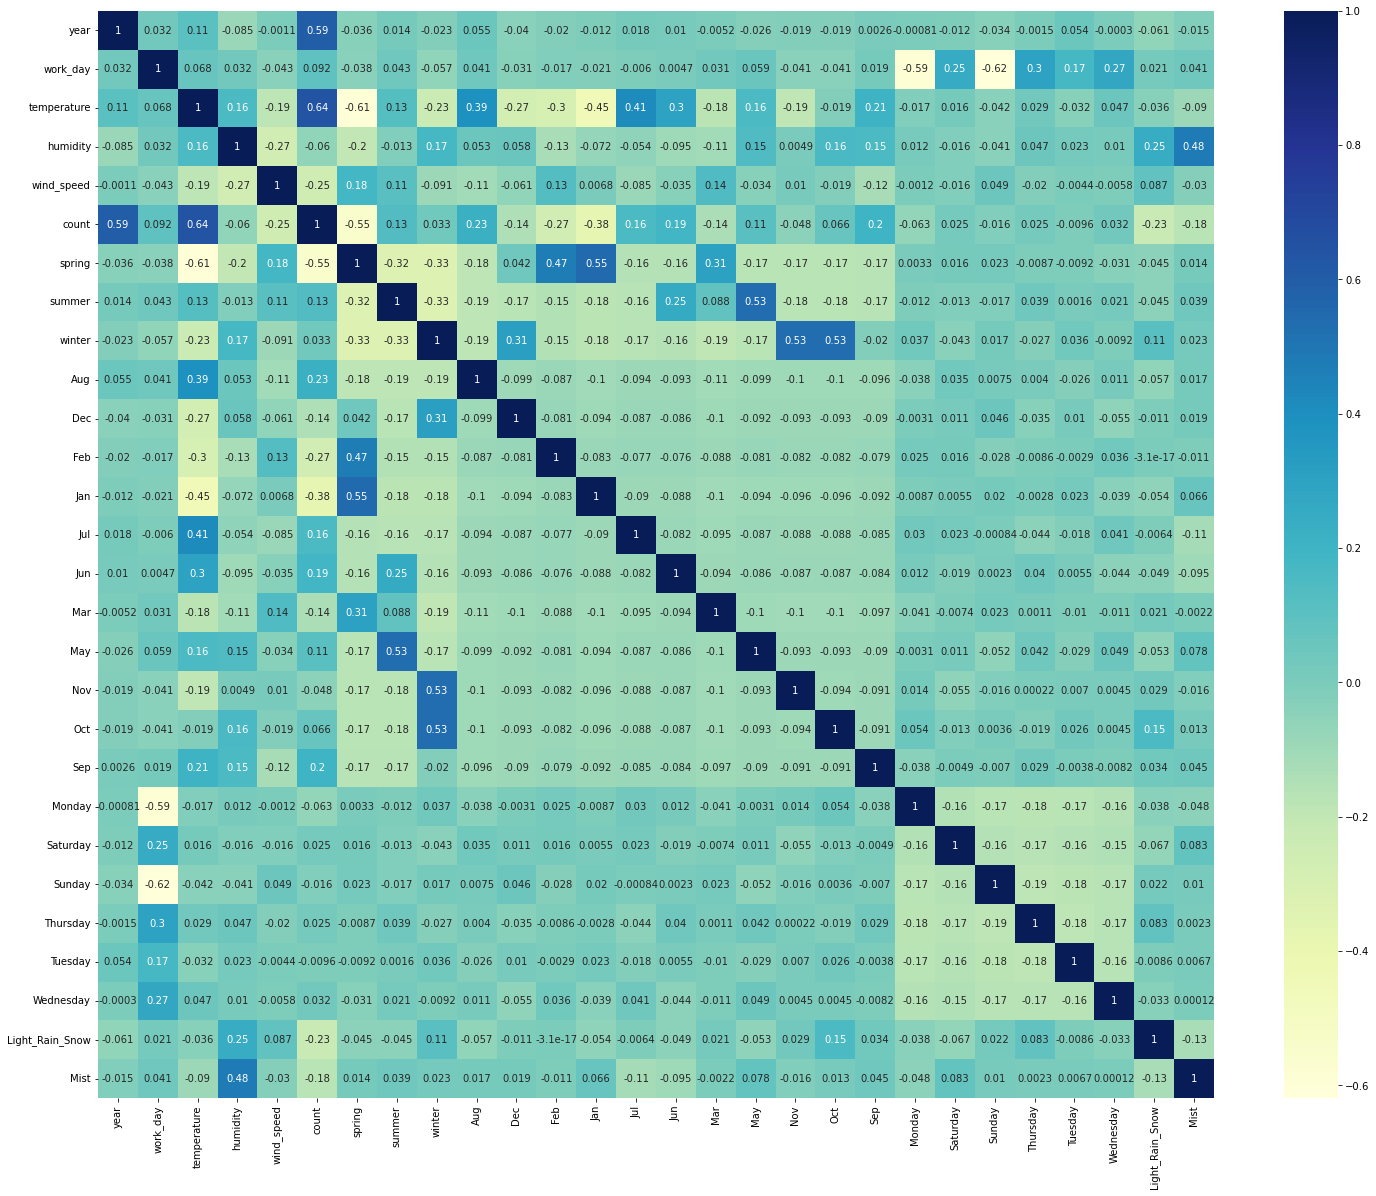

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [39]:
# X_train , y_train

y_train = df_train.pop("count")
X_train = df_train

X_train.head()

,year,work_day,temperature,humidity,wind_speed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
653,2019,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,2019,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,2019,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,2019,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,2019,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [40]:
X_train.shape

(510, 27)

In [41]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: count, Length: 510, dtype: float64

### Step 5: Building a linear model

Here we are using RFE approach for feature selection 

In [42]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 13)            
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('year', True, 1),
 ('work_day', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('wind_speed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 12),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('Light_Rain_Snow', True, 1),
 ('Mist', True, 1)]

In [44]:
# Find the top 15 variables chosen by RFE 
col = X_train.columns[rfe.support_]
col

Index(['year', 'work_day', 'temperature', 'humidity', 'wind_speed', 'spring',
       'winter', 'Jul', 'Sep', 'Monday', 'Sunday', 'Light_Rain_Snow', 'Mist'],
      dtype='object')

In [45]:
# Variables that were not chosen by RFE
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating a dataFrame with only variables selected by RFE

X_train_rfe = X_train[col]
X_train_rfe.head()

,year,work_day,temperature,humidity,wind_speed,spring,winter,Jul,Sep,Monday,Sunday,Light_Rain_Snow,Mist
653,2019,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,2019,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,2019,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,2019,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0
482,2019,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,1


In [47]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,work_day,temperature,humidity,wind_speed,spring,winter,Jul,Sep,Monday,Sunday,Light_Rain_Snow,Mist
653,1.0,2019,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,2019,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1.0,2019,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1.0,2019,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0
482,1.0,2019,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,1


In [48]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            510 non-null    float64
 1   year             510 non-null    int32  
 2   work_day         510 non-null    int64  
 3   temperature      510 non-null    float64
 4   humidity         510 non-null    float64
 5   wind_speed       510 non-null    float64
 6   spring           510 non-null    uint8  
 7   winter           510 non-null    uint8  
 8   Jul              510 non-null    uint8  
 9   Sep              510 non-null    uint8  
 10  Monday           510 non-null    uint8  
 11  Sunday           510 non-null    uint8  
 12  Light_Rain_Snow  510 non-null    uint8  
 13  Mist             510 non-null    uint8  
dtypes: float64(4), int32(1), int64(1), uint8(8)
memory usage: 29.9 KB


#### Running the linear model

In [49]:
# Running the Model and checking the Satistical significance

lm = sm.OLS(y_train , X_train_rfe.astype(float)).fit()

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.81e-190
Time:                        16:31:51   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -465.4135     16.358    -

**Inference:** Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.

### Step 6: Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [51]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16844997.27
2,work_day,9.07
11,Sunday,6.06
10,Monday,5.74
3,temperature,2.99
6,spring,2.55
4,humidity,1.89
7,winter,1.78
13,Mist,1.57
8,Jul,1.30


In [52]:
# Dropping Sep Column as it is insignificant in presence of other selected variables
X_train_rfe_new = X_train_rfe.drop(['Sep'],axis=1)

In [53]:
X_train_rfe = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train , X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.70e-188
Time:                        16:31:51   Log-Likelihood:                 503.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     497   BIC:                            -926.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -464.6018     16.583    -

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16842202.69
2,work_day,9.04
10,Sunday,6.04
9,Monday,5.71
3,temperature,2.93
6,spring,2.55
4,humidity,1.89
7,winter,1.78
12,Mist,1.57
8,Jul,1.26


In [55]:
#Dropping Spring Column as it has high VIF value 

X_train_rfe_new = X_train_rfe.drop(["spring"] , axis=1)

In [56]:
X_train_rfe = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train , X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.21e-178
Time:                        16:31:52   Log-Likelihood:                 478.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     498   BIC:                            -882.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -458.0897     17.385    -

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16792201.25
2,work_day,9.02
9,Sunday,6.03
8,Monday,5.70
4,humidity,1.88
11,Mist,1.56
3,temperature,1.44
7,Jul,1.24
10,Light_Rain_Snow,1.24
5,wind_speed,1.17


In [58]:
# Dropping humidity as it has higher VIF than Mist
X_train_rfe_new = X_train_rfe.drop(["humidity"] , axis=1)

In [59]:
X_train_rfe = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train , X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.39e-176
Time:                        16:31:52   Log-Likelihood:                 470.89
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     499   BIC:                            -873.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -465.5471     17.524    -

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16589431.14
2,work_day,9.02
8,Sunday,6.03
7,Monday,5.70
3,temperature,1.32
6,Jul,1.23
5,winter,1.11
4,wind_speed,1.07
9,Light_Rain_Snow,1.05
10,Mist,1.04


In [61]:
#Dropping Monday Column as it is insignificant in presence of other variables

X_train_rfe_new = X_train_rfe.drop(["Monday"] , axis=1)

In [62]:
X_train_rfe = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train , X_train_rfe).fit()

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.95e-177
Time:                        16:31:52   Log-Likelihood:                 468.75
No. Observations:                 510   AIC:                            -917.5
Df Residuals:                     500   BIC:                            -875.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -465.8672     17.579    -

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16588113.71
2,work_day,1.65
7,Sunday,1.63
3,temperature,1.32
6,Jul,1.23
5,winter,1.11
4,wind_speed,1.07
8,Light_Rain_Snow,1.05
9,Mist,1.04
1,year,1.02


**Inference**:R-square and Adjusted R-squared value is 81.5% and 81.2%. Also final model has all significant values and their VIF is within the cutoff limits.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
y_train_pred = lm.predict(X_train_rfe)

In [66]:
res = y_train - y_train_pred

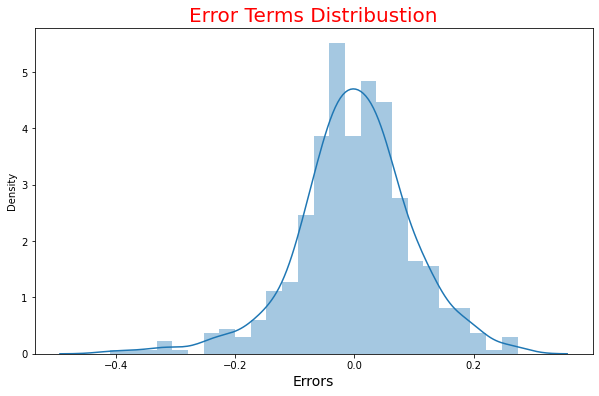

In [67]:
plt.figure(figsize=(10,6))
sns.distplot(res , norm_hist=True)
plt.xlabel('Errors', fontsize = 14)  
plt.title('Error Terms Distribustion',fontdict={'fontsize' : 20 , 'color' : "Red" }) 
plt.show()

The residual values is centered around 0 and practically follws Normal distribution

### Step 8: Making Predictions Using the Final Model

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             219 non-null    int32  
 1   work_day         219 non-null    int64  
 2   temperature      219 non-null    float64
 3   humidity         219 non-null    float64
 4   wind_speed       219 non-null    float64
 5   count            219 non-null    int64  
 6   spring           219 non-null    uint8  
 7   summer           219 non-null    uint8  
 8   winter           219 non-null    uint8  
 9   Aug              219 non-null    uint8  
 10  Dec              219 non-null    uint8  
 11  Feb              219 non-null    uint8  
 12  Jan              219 non-null    uint8  
 13  Jul              219 non-null    uint8  
 14  Jun              219 non-null    uint8  
 15  Mar              219 non-null    uint8  
 16  May              219 non-null    uint8  
 17  Nov            

In [69]:
df_test.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
184,2018,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,2019,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,2018,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
221,2018,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,2018,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#create a lits of only numerical variables

num_vars = ['temperature' , 'humidity' , 'wind_speed' , 'count']

In [71]:
# Fit the scaler on data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
184,2018,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,2019,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,2018,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
221,2018,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,2018,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df_test.describe()

,year,work_day,temperature,humidity,wind_speed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2018.479452,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.027397,0.319635
std,0.500722,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.163612,0.467403
min,2018.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test.pop('count')
X_test = df_test

In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             219 non-null    int32  
 1   work_day         219 non-null    int64  
 2   temperature      219 non-null    float64
 3   humidity         219 non-null    float64
 4   wind_speed       219 non-null    float64
 5   spring           219 non-null    uint8  
 6   summer           219 non-null    uint8  
 7   winter           219 non-null    uint8  
 8   Aug              219 non-null    uint8  
 9   Dec              219 non-null    uint8  
 10  Feb              219 non-null    uint8  
 11  Jan              219 non-null    uint8  
 12  Jul              219 non-null    uint8  
 13  Jun              219 non-null    uint8  
 14  Mar              219 non-null    uint8  
 15  May              219 non-null    uint8  
 16  Nov              219 non-null    uint8  
 17  Oct            

In [75]:
# Adding a constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,work_day,temperature,humidity,wind_speed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain_Snow,Mist
184,1.0,2018,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1.0,2019,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,1.0,2018,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
221,1.0,2018,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,1.0,2018,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# Dropping all the columns that were originally dropped from the Training Dataset

X_test_sm = X_test_sm.drop(["Aug","Dec","Feb","humidity","Jan","Jun","Mar","May","Monday","Nov",
                            "Oct","Saturday","Sep","spring","summer","Thursday","Tuesday","Wednesday"] , axis=1)

X_test_sm.head()

,const,year,work_day,temperature,wind_speed,winter,Jul,Sunday,Light_Rain_Snow,Mist
184,1.0,2018,0,0.831783,0.084219,0,1,0,0,1
535,1.0,2019,1,0.901354,0.153728,0,0,0,0,0
299,1.0,2018,1,0.511964,0.334206,1,0,0,0,1
221,1.0,2018,1,0.881625,0.339570,0,0,0,0,0
152,1.0,2018,1,0.817246,0.537414,0,0,0,0,0


In [77]:
#Predictions
y_test_pred = lm.predict(X_test_sm)

In [78]:
# Calculating the R-squarred value of the predictions

r2_score(y_true= y_test , y_pred= y_test_pred)

0.7771057388616504

###### The R-Squared predicted by the model on TEST SET (0.815) is very closed to R squared calculated by the model on TRAIN SET (0.7771)
Hence we can conclude that out model is predicting the Dependent variable effectively**

### Step 8 : Model Evaluation

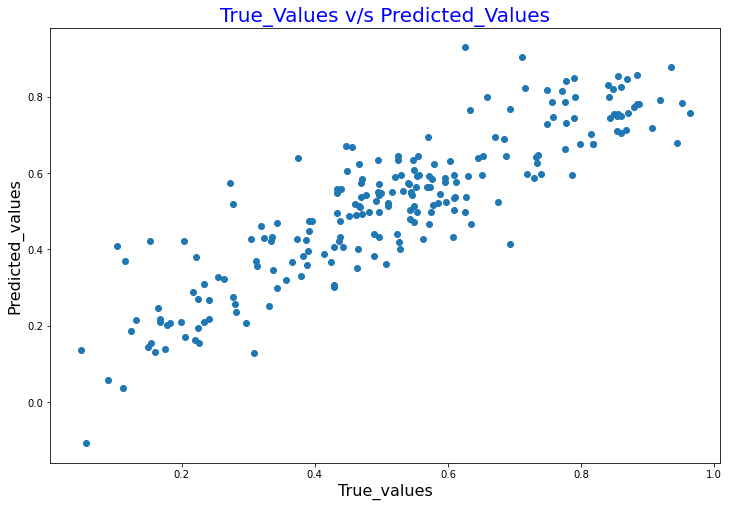

In [79]:
fig = plt.figure(figsize=(12,8) , frameon=False)
plt.scatter(y_test,y_test_pred)
plt.title('True_Values v/s Predicted_Values',fontdict={'fontsize' : 20 , 'color' : "Blue" }) 
plt.xlabel('True_values', fontsize=16)
plt.ylabel('Predicted_values', fontsize=16)  
plt.show()

We can see that the equation of our best fitted line is:
$ Count = 0.2309 \times	year + 0.0563	\times	work_day + 0.6292	\times	temperature - 0.1496	\times	wind_speed + 0.102	\times	winter - 0.0925	\times	Jul + 0.0677	\times	Sunday - 0.2806	\times	Light_Rain_Snow - 0.0773	\times	Mist $